In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [2]:
iris = load_iris()

In [3]:
df=pd.DataFrame(iris.data)

In [4]:
df['Species']=iris.target

In [5]:
df.columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Label encode Species
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()

In [10]:
df['Species'] = encoder.fit_transform(df['Species'])

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


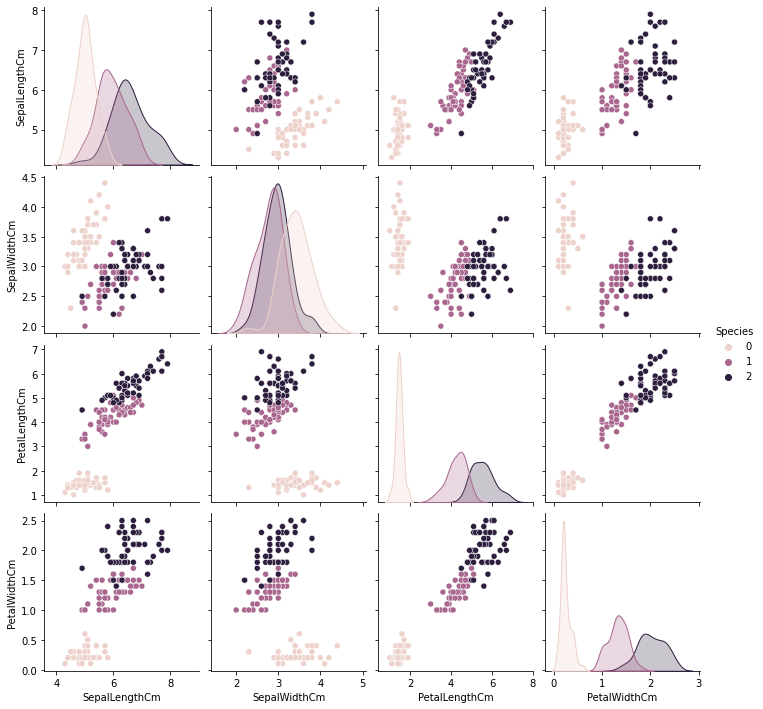

In [12]:
import seaborn as sns
sns.pairplot(df,hue='Species')

In [17]:
new_df = df[df['Species'] != 0][['SepalLengthCm','SepalWidthCm','Species']]

In [18]:
new_df.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [19]:
new_df.shape

(100, 3)

In [20]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [22]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [23]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [24]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.75
rf 0.61
knn 0.62


In [25]:
from sklearn.ensemble import VotingClassifier

## Hard Voting

In [26]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.67


## Soft Voting

In [27]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.64


## Weighted Voting

In [28]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))
            

for i=1,j=1,k=1 0.65
for i=1,j=1,k=2 0.65
for i=1,j=1,k=3 0.66
for i=1,j=2,k=1 0.63
for i=1,j=2,k=2 0.62
for i=1,j=2,k=3 0.64
for i=1,j=3,k=1 0.62
for i=1,j=3,k=2 0.64
for i=1,j=3,k=3 0.62
for i=2,j=1,k=1 0.68
for i=2,j=1,k=2 0.67
for i=2,j=1,k=3 0.67
for i=2,j=2,k=1 0.62
for i=2,j=2,k=2 0.64
for i=2,j=2,k=3 0.64
for i=2,j=3,k=1 0.64
for i=2,j=3,k=2 0.64
for i=2,j=3,k=3 0.65
for i=3,j=1,k=1 0.7
for i=3,j=1,k=2 0.68
for i=3,j=1,k=3 0.68
for i=3,j=2,k=1 0.69
for i=3,j=2,k=2 0.67
for i=3,j=2,k=3 0.65
for i=3,j=3,k=1 0.66
for i=3,j=3,k=2 0.65
for i=3,j=3,k=3 0.65


## Classifiers of Same Algo

In [29]:
from sklearn.svm import SVC

In [30]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [31]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


In [32]:
# The End.